### Checking Chrome Driver

In [1]:
## installing Chrome Driver
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install();

## Importing Universal Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import numpy as np

## Reading Dataset

In [3]:
df = pd.read_csv('data/task2.csv')

## Showing Information around the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13972 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         13972 non-null  int64 
 1   Experience_Level  13972 non-null  object
 2   Employment_Type   13972 non-null  object
 3   Job_Title         13972 non-null  object
 4   Salary            13972 non-null  int64 
 5   Salary_Currency   13972 non-null  object
 6   Remote_Ratio      13972 non-null  int64 
 7   Company_Size      13972 non-null  object
dtypes: int64(3), object(5)
memory usage: 873.4+ KB


## Cleansing Dataset of Duplicates and NANs

In [5]:
cleansed_df = df.drop_duplicates()
cleansed_df = cleansed_df.dropna()

In [6]:
cleansed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


## Extracting All Currencies in the Dataset

In [7]:
value_counts = cleansed_df.groupby('Salary_Currency').size()
value_counts = value_counts.reset_index()
value_counts.columns = ['Salary_Currency', 'Count']
value_counts

,Salary_Currency,Count
0,AUD,12
1,BRL,4
2,CAD,48
3,CHF,6
4,CLP,1
5,DKK,3
6,EUR,339
7,GBP,410
8,HKD,1
9,HUF,3


## Dropping Entries with Minor Currencies

In [8]:
filter_indexes = cleansed_df['Salary_Currency'].isin(value_counts[value_counts['Count'] >= 10]['Salary_Currency'])
filtered_df = cleansed_df[filter_indexes]
filtered_df

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


In [9]:
filtered_df['Salary_Currency'].value_counts()

Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
Name: count, dtype: int64

## Adding a Column to the Dataset Regarding Salaries in USD

In [10]:
from task2.currency import find_exchange_rate

exchange_rates = {}
for currency in filtered_df['Salary_Currency'].unique():
    exchange_rates[currency] = find_exchange_rate(currency)

In [11]:
exchange_rates

{'USD': 1, 'EUR': 108.0, 'GBP': 126.0, 'CAD': 74.0, 'AUD': 66.0, 'INR': 12.0}

In [12]:
filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(
    lambda entry: exchange_rates[entry['Salary_Currency']] * entry['Salary'], 
    axis=1)
filtered_df[filtered_df['Salary_Currency'] != 'USD']

C:\Users\AFRAA\AppData\Local\Temp\ipykernel_21856\1824344305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, "Salary_in_USD"] = filtered_df.apply(


,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
29,2024,Entry-Level,Full-Time,Data Analyst,39600,EUR,0,Medium,4276800.0
30,2024,Entry-Level,Full-Time,Data Analyst,33600,EUR,0,Medium,3628800.0
143,2024,Senior-Level,Full-Time,Data Quality Analyst,80000,GBP,0,Medium,10080000.0
144,2024,Senior-Level,Full-Time,Data Quality Analyst,45000,GBP,0,Medium,5670000.0
243,2023,Entry-Level,Full-Time,Data DevOps Engineer,44382,EUR,50,Large,4793256.0
...,...,...,...,...,...,...,...,...,...
13952,2021,Mid-Level,Full-Time,Lead Data Analyst,1450000,INR,100,Large,17400000.0
13956,2021,Mid-Level,Full-Time,Data Engineer,38400,EUR,100,Large,4147200.0
13961,2020,Senior-Level,Full-Time,Machine Learning Engineer,40000,EUR,100,S,4320000.0
13965,2021,Mid-Level,Full-Time,Data Engineer,24000,EUR,50,Large,2592000.0


## Visualizations

In [13]:
finalized_df = filtered_df

### Histogram of All Salaries

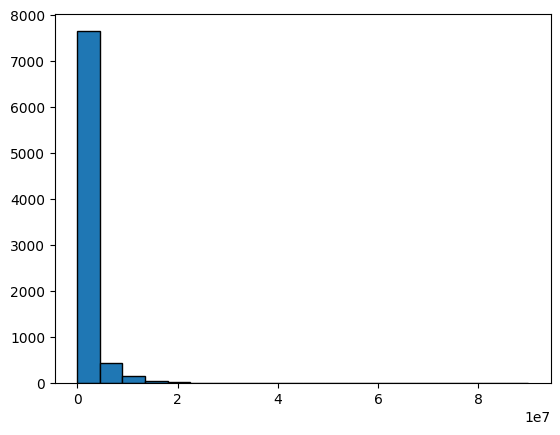

In [14]:
plt.figure()
finalized_df['Salary_in_USD'].hist(bins=20, edgecolor='black')
plt.grid(False)
plt.show()

### Histogram of Salaries for Each Experience Level

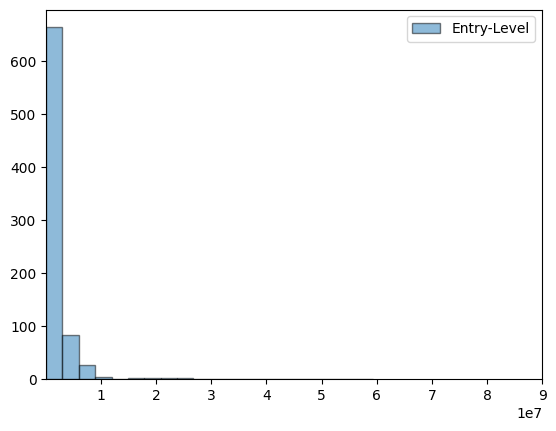

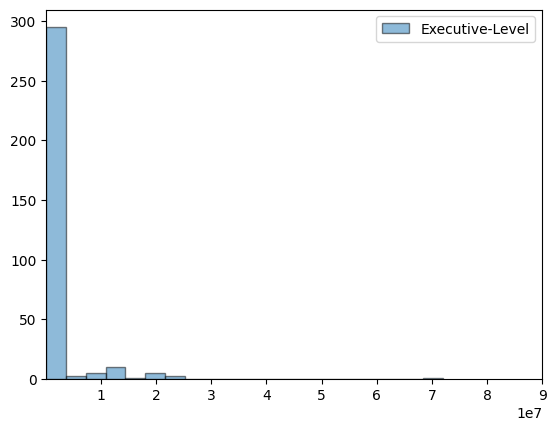

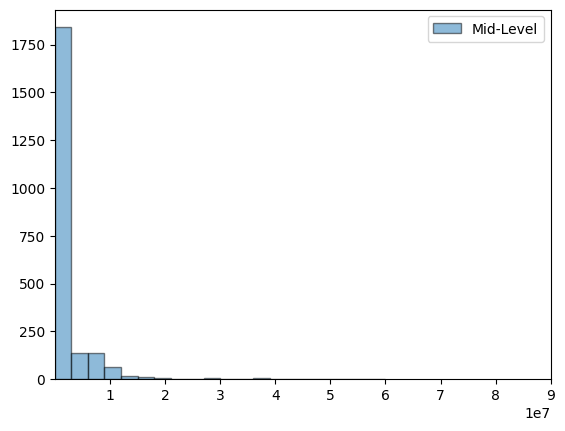

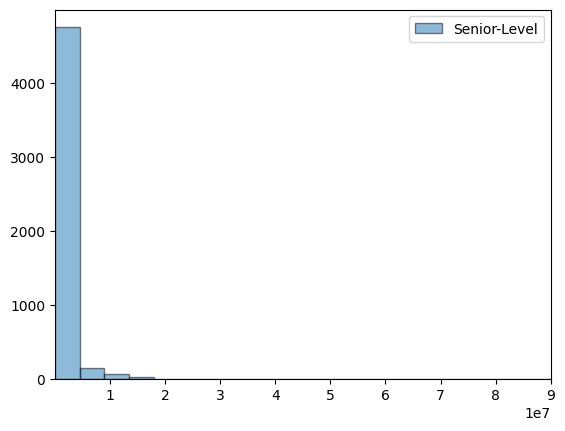

In [15]:
xmin, xmax = finalized_df['Salary_in_USD'].min(), finalized_df['Salary_in_USD'].max()
for experience, group in finalized_df.groupby('Experience_Level'):
    data = group['Salary_in_USD']
    plt.figure()
    plt.hist(data, bins=20, alpha=0.5, edgecolor='black', label=experience)
    plt.legend()
    plt.xlim(xmin, xmax)
plt.show()

### 10 Most Popular Job Titles

10 most popular job titles are listed below.

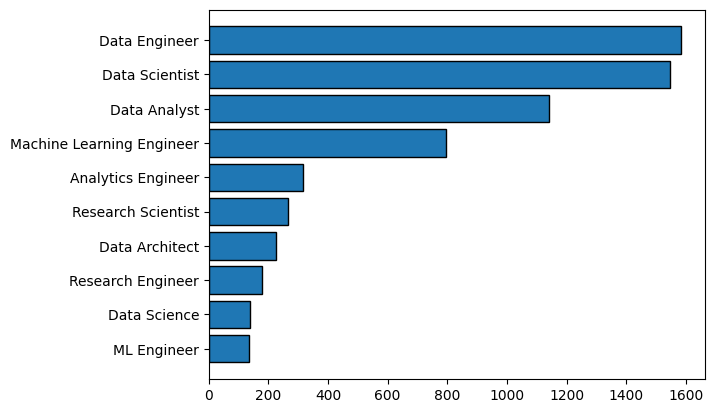

In [16]:
data = finalized_df['Job_Title'].value_counts().sort_values(ascending=False)[:10]
data = data[::-1]
plt.barh(data.index, data, edgecolor='black')
plt.show()

### Top 10 Highest Salaries
Top ten highest salaries and the entry corresponding to them are listed below.

In [17]:
finalized_df.sort_values(ascending=False, by='Salary_in_USD')[:10]

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size,Salary_in_USD
13206,2022,Senior-Level,Full-Time,Lead Machine Learning Engineer,7500000,INR,50,Large,90000000.0
13971,2021,Senior-Level,Full-Time,Data Science Manager,7000000,INR,50,Large,84000000.0
13427,2022,Executive-Level,Full-Time,Head of Machine Learning,6000000,INR,50,Large,72000000.0
11723,2023,Mid-Level,Full-Time,Head of Data Science,5000000,INR,50,Large,60000000.0
5885,2023,Entry-Level,Full-Time,AI Programmer,4950806,INR,0,S,59409672.0
13865,2021,Senior-Level,Full-Time,Machine Learning Engineer,4900000,INR,0,Large,58800000.0
12124,2022,Senior-Level,Full-Time,Lead Data Scientist,4460000,INR,0,Large,53520000.0
13298,2022,Mid-Level,Full-Time,Data Scientist,4200000,INR,100,Large,50400000.0
9887,2023,Entry-Level,Full-Time,Applied Machine Learning Scientist,4000000,INR,100,Large,48000000.0
11996,2021,Senior-Level,Full-Time,Data Scientist,4000000,INR,100,Large,48000000.0
